<a href="https://colab.research.google.com/github/Volt-github24/Groupe-4-info-l3-datasciences-tutoriels/blob/main/Tutoriel_sur_le_perceptron_multicouche_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFOL3 - SDD- UY1 - Departement d'informatique**

# **IMPLEMENTATION DU TUTORIEL SUR LE PERCEPTRON MULTICOUCHE**

 >>>  [*Optimizing Neural Networks using Keras (with Image recognition case study)*](https://www.analyticsvidhya.com/blog/2016/10/tutorial-optimizing-neural-networks-using-keras-with-image-recognition-case-study/#one)




                                   
### Noms des membres du groupe (**Groupe 4**) :
  1. NOUCHEN TCHAMBA Parnell Voltaire - 19M2326
  2. DJEUMEZA DONGMO Julie Merveille - 19M2105
  3. MADJOU Alvine Patricia - 19M2103
  4. NAKAM YOPDUP Manuella Kristeva - 19M2233

iMPLEMENTATON DE **KERAS** SUR UN DATASET 

Tout d'abord il est necessaire d'etablir une liaison avec le drive pour pouvoiraccederaux fichiersa utiliser

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


importation des differentes librairies

In [ ]:
%pylab inline
import os
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras

Populating the interactive namespace from numpy and matplotlib


initialisation du RandomState

In [ ]:
# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

definition des chemins d'acces

In [ ]:
%cd MyDrive/ML


/content/drive/MyDrive/ML


In [ ]:
%ls

test/  Test.csv  train/  train.csv


In [ ]:
root_dir = os.path.abspath('../..') 
data_dir = os.path.join(root_dir, 'data') 
sub_dir = os.path.join(root_dir, 'sub') 
# check for existence 
os.path.exists(root_dir) 
os.path.exists(data_dir) 
os.path.exists(sub_dir)

False

In [ ]:

train = pd.read_csv('train.csv')
test = pd.read_csv('Test.csv')

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
!ls
print(img_name)

test  Test.csv	train  train.csv


NameError: ignored

In [ ]:
img_name = rng.choice(train.filename)
filepath = os.path.join('train', img_name)

img = imread(filepath, flatten=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

FileNotFoundError: ignored

In [ ]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%ls

sample_data/


In [ ]:
%cd/drive/Mydrive/data_perceptron

[Errno 2] No such file or directory: '/drive/Mydrive/data_perceptron'
/content


In [ ]:
%cd/drive/Mydrive/train

[Errno 2] No such file or directory: '/drive/Mydrive/train'
/content


In [ ]:
%cd/drive/Mydrive/test

[Errno 2] No such file or directory: '/drive/Mydrive/test'
/content


In [ ]:
%cd/drive/Mydrive/data_perceptron_multicouches

[Errno 2] No such file or directory: '/drive/Mydrive/data_perceptron_multicouches'
/content


In [ ]:
%pylab inline
import os
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
import tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
# Definition du nombre de neuronnes d'entrees
input_num_units = 784

# Definition de 5 couches cachees avec 50 neuronnes associees a chacune des couches cachees
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50

# Definition de nombre de neuronnes en sortie a 10
output_num_units = 10

# Definition du nombre d'epochs, ie le nombre de fois que l'on va faire passer l'ensemble du jeu de donnees
epochs = 5

#Definition de la taille d'un lot, ie du nombre de couches par lots
batch_size = 128

# Definition d'un modele sequentiel 
model = keras.Sequential([
layer.Dense(784, activation='relu', name='layer1'),
layer.Dense(50, activation='relu', name='layer2'), 
layer.Dense(50, activation='relu', name='layer3'), 
layer.Dense(50, activation='relu', name='layer4'),  
layer.Dense(50, activation='relu', name='layer5'), 
layer.Dense(50, activation='relu', name='layer6'), 

layer.Dense(10, activation='softmax', name'layer7'),
])

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


TypeError: ignored

In [ ]:
model.compile(loss='categorical_crossentropery', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, nb_epoch=epochs, batch_size = batch_size, validation = (val_x, val_y))

In [ ]:
# Definition des entrees
input_num_units = 784

# Definition de 5 couches cachees avec 50 neuronnes associees a chacune des couches cachees
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50

# Definition de nombre de couches en sortie a 10
output_num_units = 10

# Definition du nombre d'epochs, ie le nombre de fois que l'on va faire passer l'ensemble du jeu de donnees
epochs = 5

#Definition de la taille d'un lot, ie du nombre de couches par lots
batch_size = 128

dropout_ratio = 0.2

# Definition d'un modele sequentiel 
model = Sequential([
Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
Dropout(dropout_ratio),
Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'), 
Dropout(dropout_ratio),
Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
Dropout(dropout_ratio),
Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
Dropout(dropout_ratio), 
Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
Dropout(dropout_ratio),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropery', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, nb_epoch=epochs, batch_size = batch_size, validation = (val_x, val_y))

In [ ]:


input_num_units = 784

# Definition de 5 couches cachees avec 50 neuronnes associees a chacune des couches cachees
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50

# Definition de nombre de couches en sortie a 10
output_num_units = 10

# Definition du nombre d'epochs, ie le nombre de fois que l'on va faire passer l'ensemble du jeu de donnees
epochs = 50

#Definition de la taille d'un lot, ie du nombre de couches par lots
batch_size = 128

dropout_ratio = 0.2

# Definition d'un modele sequentiel 
model = Sequential([
Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
Dropout(dropout_ratio),
Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'), 
Dropout(dropout_ratio),
Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'),
Dropout(dropout_ratio),
Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'),
Dropout(dropout_ratio), 
Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'),
Dropout(dropout_ratio),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
])

In [ ]:
#Une fois le nombre d'epochs ajuste, verifions l=notre precision
model.compile(loss='categorical_crossentropery', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, nb_epoch=epochs, batch_size = batch_size, validation = (val_x, val_y))

**PEAUFINEMENT** **DU** **MODELE** **DE** **RESEAU** **DE** **NEURONES**

In [ ]:
#Importation des modules supplementaires à ceux importer plus haut

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

In [ ]:
# On genere des nombres aléatoires

seed = 128 #initialisation du generateur de nombres aleatoires
rng = np.random.RandomState(seed)

In [ ]:
#On définit les differents chemins qui nous seront utiles

root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, 'data')
sub_dir = os.path.join(root_dir, 'sub')

# Verification de leur exixtence
os.path.exists(root_dir)
os.path.exists(data_dir)
os.path.exists(sub_dir)

False

In [ ]:
#Lecture de l'ensemble des donnees et convertion sous forme utilisable

train = pd.read_csv('/content/drive/MyDrive/data_perceptron/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data_perceptron/Test.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/data_perceptron/sample_submission.csv')

temp = []
for img_name in train.filename:
  if img_name == "101.png":
      break
  image_path = "/content/drive/MyDrive/data_perceptron/Images/train/"+img_name #On recupere le chemin d'acces pour chaque image dans le fichier d'entrainement
  img = imread(image_path) # Chargement de l'image d'entrainement
  img = img.astype('float32')
  temp.append(img) # ajout de l'image d'entrainement dans temp

train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
  if img_name == "49101.png":
      break
  image_path = "/content/drive/MyDrive/data_perceptron/Images/test/"+img_name#On recupere le chemin d'acces pour chaque image dans le fichier de test
  img = imread(image_path) # Chargement de l'image de test
  img = img.astype('float32')
  temp.append(img) # ajout de l'image de test dans temp

test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [ ]:
# Division du jeu d'entrainement en jeu de formation  et jeu de validation

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [ ]:
# Definition des variables

input_num_units = 784 #nombre de neurone en entree
hidden_num_units = 500 # Ici le nombre de neurone dans la couche cachee a ete augmentee et est fixé à 500  
output_num_units = 10 # nombre de neurones en sortie
epochs = 5 # nombre d'epochs
batch_size = 128 # definition de la taille d'un lot

#Definition du modele sequentiel
model = Sequential([
 Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])

TypeError: ignored

In [ ]:
# Testons le modele

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_500 = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

### **Mise en œuvre de réseaux de neurones à l'aide de TensorFlow**

Avant ecrivons un petit programme permenttant d'additionner deux nombres avec tensorflow

In [ ]:
# import tensorflow
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

# build computational graph
a = tf.compat.v1.placeholder(tf.int16)
b = tf.compat.v1.placeholder(tf.int16)

addition = tf.add(a, b)

# initialize variables
init = tf.compat.v1.global_variables_initializer()

# create session and run the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print("Addition: %i" % sess.run(addition, feed_dict={a: 5, b: 3}))

# close session
sess.close()


Dans l'approche de tensorflow nous avons:
Crée un graphique de calcul, il peut s'agit ici de l'addition comme operation.
Initialiser les variables, pour compiler les variables définies précédemment
Créer une session, le graphe compilé est passé à la session, qui démarre son exécution, ensuite on ferme la session.

Passons à l'mplementation du reseau de neuronnes.

- Définition de l'architecture du réseau de neurones à compiler
- Transfért des données vers notre modèle
- Sous le capot, les données sont d'abord divisées en lots, afin de pouvoir être ingérées. Les lots sont d'abord prétraités, augmentés puis introduits dans le réseau de neurones pour la formation
- Le modèle est ensuite entraîné progressivement
- Affichage de la précision pour un nombre spécifique de pas de temps
- Après la formation, enregistrons le modèle pour une utilisation future
- Testons le modèle sur de nouvelles données et vérifions ses performances

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['seed', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


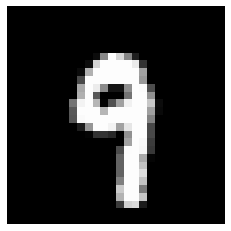

La matrice correspondante à cette image 
 
 [[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


In [ ]:
# iMPORTATION DES MODULES NECESSAIRES
%pylab inline

import os
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Definissons en quelque sorte la graine pour le random
seed = 128
rng = np.random.RandomState(seed)


#Importons les donnnees
train = pd.read_csv('/content/drive/MyDrive/data_perceptron/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data_perceptron/Test.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/data_perceptron/sample_submission.csv')

train.head() # pour voir a quoi ressemblent les 05 premieres lignes du dataset train

# Lisons une image et affichons pour voir à quoi elles ressemblent.

img = imread('/content/drive/MyDrive/data_perceptron/Images/train/1.png') # cest une image prise dans le lot d'images d'entrainement

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

print("La matrice correspondante à cette image \n \n", img)

Pour une manipulation plus aisee, mettons toutes ces donnees dans une matrice numpy

In [ ]:
temp = []
for img_name in train.filename:
    if img_name == "101.png":
      break
    image_path = "/content/drive/MyDrive/data_perceptron/Images/train/"+img_name
    img = imread(image_path)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

temp = []
for img_name in test.filename:
    if img_name == "49101.png":
      break
    image_path = "/content/drive/MyDrive/data_perceptron/Images/test/"+img_name
    img = imread(image_path)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

Pour tester le bon fonctionnement de notre modèle, nous créons un ensemble de validation. Prenons une taille fractionnée de 70:30 pour l'ensemble de train par rapport à l'ensemble de validation

In [ ]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train.label.values[:split_size], train.label.values[split_size:]

Maintenant definissons quelques fonctions que nous utiliserons plutard

In [ ]:
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot

def preproc(unclean_batch_x):
    """Convert values to range 0-1"""
    temp_batch = unclean_batch_x / unclean_batch_x.max()
    
    return temp_batch

def batch_creator(batch_size, dataset_length, dataset_name):
    """Create batch with random samples and return appropriate format"""
    batch_mask = rng.choice(dataset_length, batch_size)
    
    batch_x = eval(dataset_name + '_x')[[batch_mask]].reshape(-1, input_num_units)
    batch_x = preproc(batch_x)
    
    if dataset_name == 'train':
        batch_y = eval(dataset_name).ix[batch_mask, 'label'].values
        batch_y = dense_to_one_hot(batch_y)
        
    return batch_x, batch_y

 Définissons notre architecture de réseau de neurones. Nous définissons un réseau de neurones à 3 couches : entrée, caché et sortie. Le nombre de neurones en entrees et en sortie est fixe car nous connaissons la taille d'une image et le nombre de classse en sortie (respectivement 28*28 et 10)

In [ ]:
tf.compat.v1.disable_eager_execution()

### set all variables

# number of neurons in each layer
input_num_units = 28*28 # 28*28 neurones en entrees
hidden_num_units = 500 # 500 neurones dans la couche intermediare
output_num_units = 10 # 10 neurones pour la sortie pour les 10 classes que nous avons

# define placeholders
x = tf.compat.v1.placeholder(tf.float32, [None, input_num_units])
y = tf.compat.v1.placeholder(tf.float32, [None, output_num_units])

# set remaining variables
epochs = 5
batch_size = 128
learning_rate = 0.01

### define weights and biases of the neural network 

weights = {
    'hidden': tf.Variable(tf.random.normal([input_num_units, hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random.normal([hidden_num_units, output_num_units], seed=seed))
}

biases = {
    'hidden': tf.Variable(tf.random.normal([hidden_num_units], seed=seed)),
    'output': tf.Variable(tf.random.normal([output_num_units], seed=seed))
}

Creons  maintenant notre graphe de calcul de réseaux de neurones

In [ ]:
hidden_layer = tf.add(tf.matmul(x, weights['hidden']), biases['hidden'])
hidden_layer = tf.nn.relu(hidden_layer)

output_layer = tf.matmul(hidden_layer, weights['output']) + biases['output']

Definissons le cout de notre reseau de neurones

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output_layer, y))


Nous utiliserons une variante de l'algorithme de descente de gradient : ADAM pour minimiser le cout

In [ ]:
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Maintenant que la structure de notre reseau de neurones est ok, definissons nos variables.

In [ ]:
init = tf.compat.v1.global_variables_initializer()

Créons maintenant une session et exécutons notre réseau de neurones dans la session. Nous validons également la précision de nos modèles sur l'ensemble de validation que nous avons créé

In [ ]:
with tf.compat.v1.Session() as sess:
    # create initialized variables
    sess.run(init)
    
    ### for each epoch, do:
    ###   for each batch, do:
    ###     create pre-processed batch
    ###     run optimizer by feeding batch
    ###     find cost and reiterate to minimize
    
    for epoch in range(epochs):
        avg_cost = 0
        total_batch = int(train.shape[0]/batch_size)
        for i in range(total_batch):
            batch_x, batch_y = batch_creator(batch_size, train_x.shape[0], 'train')
            c = sess.run([optimizer, cost], feed_dict = {x: batch_x, y: batch_y})
            avg_cost += c / total_batch
        print ("Epoch:", (epoch+1), "cost =", "{:.5f}".format(avg_cost))
    print ("\nTraining complete!")
    # find predictions on val set
    pred_temp = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(pred_temp, "float"))
    print("Validation Accuracy:", accuracy.eval({x: val_x.reshape(-1, input_num_units), y: dense_to_one_hot(val_y)}))
    
    predict = tf.argmax(output_layer, 1)
    pred = predict.eval({x: test_x.reshape(-1, input_num_units)})

testons le modele

In [ ]:
img_name = rng.choice(test.filename)
filepath = '/content/drive/MyDrive/data_perceptron/Images/Test/49050.png'

img = imread(filepath)

test_index = int(img_name.split('.')[0]) - 49000

print ("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()